## Regresiones lineales

In [531]:
import math as m
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [532]:
def getTestSizeTrainSize(dataFrame, testSplit):
    return m.ceil(shuffledDataFrame.shape[0]*(1-testSplit)), m.floor(shuffledDataFrame.shape[0]*testSplit)

def getTrainData(shuffledDataFrame, trainSize):
    return shuffledDataFrame.iloc[0:trainSize, :8], shuffledDataFrame.iloc[0:trainSize, 8:9]

def getTestData(shuffledDataFrame, trainSize, testSize):
    return shuffledDataFrame.iloc[trainSize:trainSize+trainSize, :8], shuffledDataFrame.iloc[trainSize:trainSize+trainSize, 8:9]

def standarizeDataFrame(dataFrame):
    scaled = pd.DataFrame(scaler.fit_transform(dataFrame))
    scaled.columns = dataFrame.columns
    return scaled

def getScore(model, dataX, dataY):
    return model.score(dataX, dataY)

def getMSE(model, dataX, dataY):
    return np.mean((model.predict(dataX) - dataY)**2)

In [533]:
originalDataFrame = pd.read_csv('Database/Concrete_Data_Yeh.csv')
splitRatio = 0.2

### 1. Regresión básica y completa

In [534]:
shuffledDataFrame = originalDataFrame.sample(frac=1)
shuffledDataFrame = standarizeDataFrame(shuffledDataFrame)
testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)

linearModel1 = linear_model.LinearRegression()
linearModel1.fit(trainX, trainY)

print(f'Training score: {getScore(linearModel1, trainX, trainY)}')
print(f'Training MSE: {getMSE(linearModel1, trainX, trainY)}')
print(f'Test score: {getScore(linearModel1, testX, testY)}')
print(f'Test MSE: {getMSE(linearModel1, testX, testY)}')

Training score: 0.6068253170157154
Training MSE: csMPa    0.382415
dtype: float64
Test score: 0.6548582459226668
Test MSE: csMPa    0.38976
dtype: float64


### 2. Regresión básica con componentes principales

In [535]:
shuffledDataFrame = originalDataFrame.sample(frac=1)
shuffledDataFrame = standarizeDataFrame(shuffledDataFrame)
testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)
trainX = trainX[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']]
testX = testX[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']]

linearModel1 = linear_model.LinearRegression()
linearModel1.fit(trainX, trainY)

print(f'Training score: {getScore(linearModel1, trainX, trainY)}')
print(f'Training MSE: {getMSE(linearModel1, trainX, trainY)}')
print(f'Test score: {getScore(linearModel1, testX, testY)}')
print(f'Test MSE: {getMSE(linearModel1, testX, testY)}')

Training score: 0.5821515357491042
Training MSE: csMPa    0.418356
dtype: float64
Test score: 0.5852488575065732
Test MSE: csMPa    0.352944
dtype: float64


### 3. Regresión completa tranformando variables

Training score: 0.7444933037273372
Training MSE: csMPa    0.257482
dtype: float64
Test score: 0.7507968925760995
Test MSE: csMPa    0.227916
dtype: float64


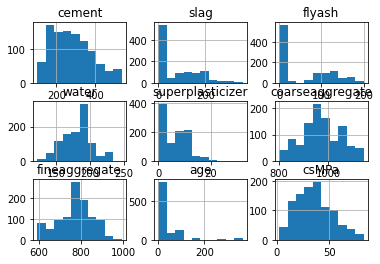

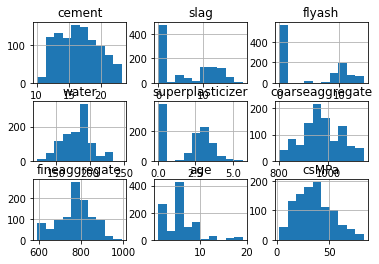

In [536]:
shuffledDataFrame = originalDataFrame.sample(frac=1)

shuffledDataFrame.hist()

shuffledDataFrame['cement'] = np.sqrt(shuffledDataFrame['cement'])
shuffledDataFrame['flyash'] = np.sqrt(shuffledDataFrame['flyash'])
shuffledDataFrame['slag'] = np.sqrt(shuffledDataFrame['slag'])
shuffledDataFrame['superplasticizer'] = np.sqrt(shuffledDataFrame['superplasticizer'])
shuffledDataFrame['age'] = np.sqrt(shuffledDataFrame['age'])

shuffledDataFrame.hist()

shuffledDataFrame = standarizeDataFrame(shuffledDataFrame)
testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)

linearModel1 = linear_model.LinearRegression()
linearModel1.fit(trainX, trainY)

print(f'Training score: {getScore(linearModel1, trainX, trainY)}')
print(f'Training MSE: {getMSE(linearModel1, trainX, trainY)}')
print(f'Test score: {getScore(linearModel1, testX, testY)}')
print(f'Test MSE: {getMSE(linearModel1, testX, testY)}')

### 4. Regresión transformando variables y eliminando filas

In [565]:
shuffledDataFrame = originalDataFrame.sample(frac=1)

shuffledDataFrame = shuffledDataFrame.query('slag != 0 and flyash!= 0 and superplasticizer != 0')


shuffledDataFrame['cement'] = np.sqrt(shuffledDataFrame['cement'])
shuffledDataFrame['slag'] = np.sqrt(shuffledDataFrame['slag'])


testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)

linearModel1 = linear_model.LinearRegression()
linearModel1.fit(trainX, trainY)

print(f'Training score: {getScore(linearModel1, trainX, trainY)}')
print(f'Training MSE: {getMSE(linearModel1, trainX, trainY)}')
print(f'Test score: {getScore(linearModel1, testX, testY)}')
print(f'Test MSE: {getMSE(linearModel1, testX, testY)}')

Training score: 0.6874637390045124
Training MSE: csMPa    64.676337
dtype: float64
Test score: 0.5827620739111945
Test MSE: csMPa    80.537374
dtype: float64
